<a href="https://colab.research.google.com/github/ManciniGa/Aprendizado-Profundo/blob/main/CHATBOT_TREINAMENTO_PERSONALIZADO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CHATBOT TREINAMENTO PERSONALIZADO

---

O código apresentado implementa um pipeline completo de reconhecimento de caracteres manuscritos em imagens utilizando visão computacional e aprendizado de máquina. Ele combina técnicas de pré-processamento de imagem, como conversão para escala de cinza, suavização, limiarização e detecção de contornos, com uma rede neural treinada para classificar caracteres. As imagens processadas são segmentadas em regiões de interesse (ROIs) correspondentes a possíveis caracteres, que são redimensionadas, normalizadas e passadas como entrada para a rede. As previsões retornadas são então interpretadas e exibidas diretamente na imagem original com caixas delimitadoras e rótulos para cada caractere identificado. Além disso, os caracteres reconhecidos são concatenados em uma string final, facilitando a análise e edição do texto extraído. Esse sistema demonstra uma integração eficaz entre técnicas tradicionais de visão computacional e modelos de aprendizado profundo, oferecendo uma solução robusta para a digitalização e interpretação de textos manuscritos.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 36)                  │           4,644 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 138,470 (540.90 KB)

 Trainable params: 138,468 (540.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

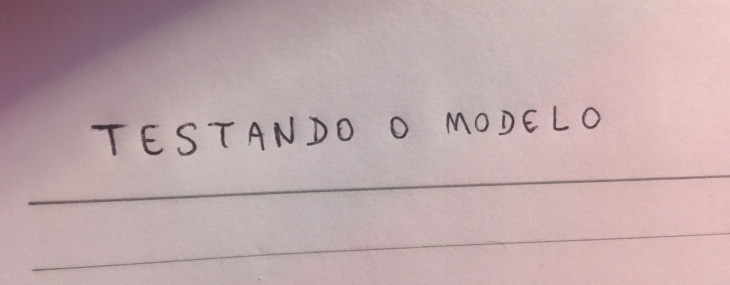

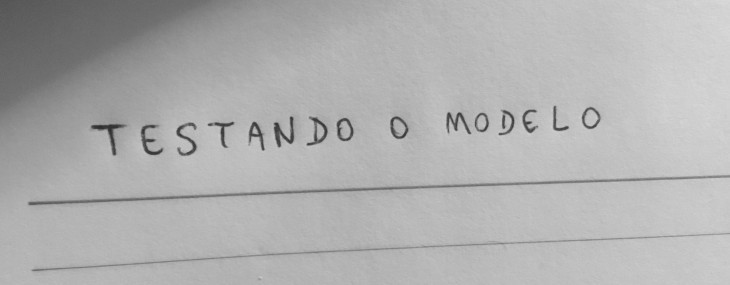

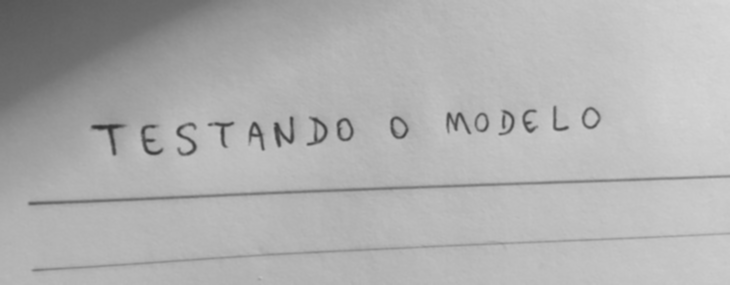

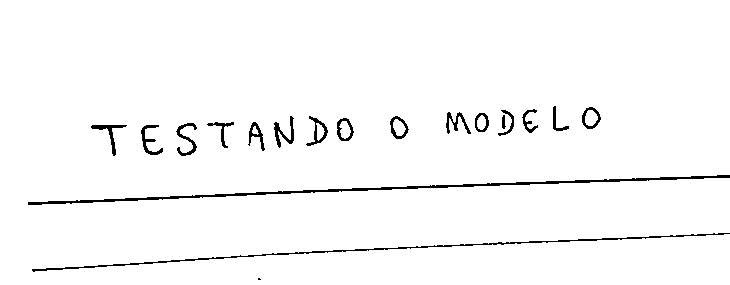

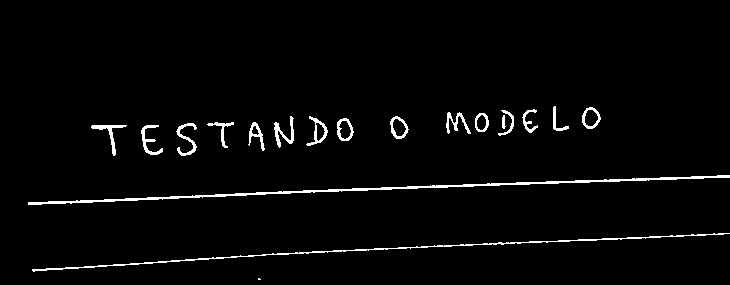

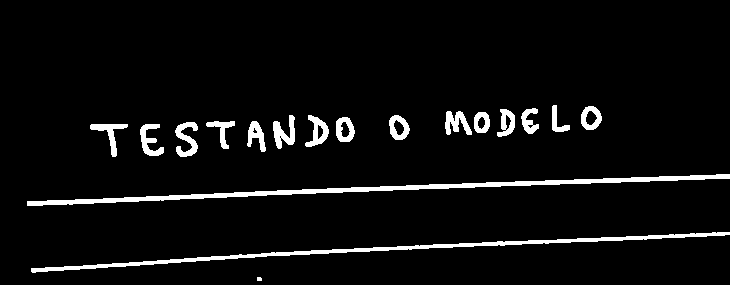

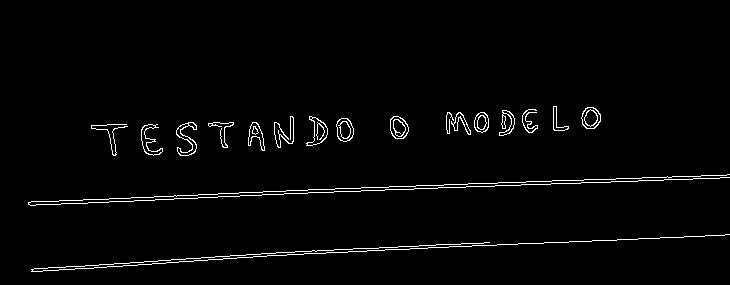

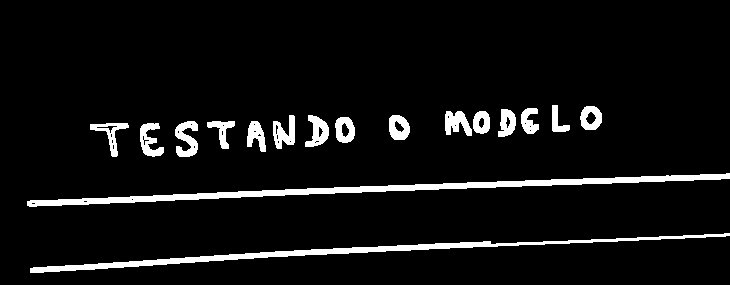

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
T -> 99.89%
E -> 100.00%
S -> 98.41%
T -> 99.34%
A -> 100.00%
N -> 99.99%
D -> 100.00%
O -> 54.03%
D -> 93.65%
M -> 99.94%
O -> 44.77%
D -> 99.97%
E -> 99.98%
L -> 100.00%
0 -> 77.17%


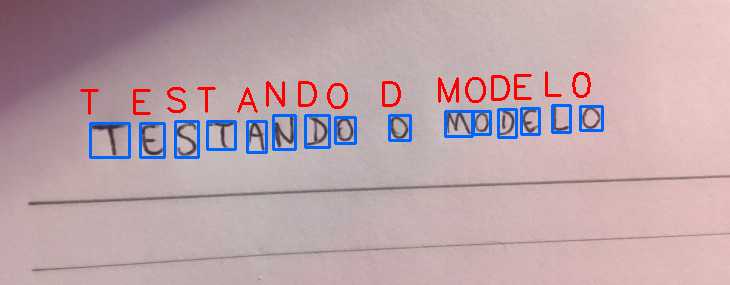

In [ ]:
# Importando as bibliotecas necessárias
import numpy as np  # Biblioteca para manipulação de arrays numéricos
import cv2  # Biblioteca para processamento de imagens
from tensorflow.keras.models import load_model  # Carrega modelos pré-treinados do Keras
from imutils.contours import sort_contours  # Ferramenta para ordenar contornos
import imutils  # Biblioteca para funções de manipulação de imagens
from google.colab.patches import cv2_imshow  # Função para exibir imagens no Google Colab

# Carregando o modelo treinado
rede_neural = load_model('/content/rede_neural.h5')  # Carrega o modelo salvo no arquivo especificado
rede_neural.summary()  # Mostra um resumo da arquitetura do modelo carregado

# Carregando e pré-processando a imagem
img = cv2.imread('/content/teste-manuscrito01.jpg')  # Lê a imagem do arquivo
cv2_imshow(img)  # Exibe a imagem original

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Converte a imagem para escala de cinza
cv2_imshow(gray)  # Exibe a imagem em escala de cinza

desfoque = cv2.GaussianBlur(gray, (3, 3), 0)  # Aplica um filtro gaussiano para suavizar a imagem
cv2_imshow(desfoque)  # Exibe a imagem suavizada

adapt_media = cv2.adaptiveThreshold(
    desfoque, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9
)  # Aplica limiarização adaptativa
cv2_imshow(adapt_media)  # Exibe a imagem binarizada

inv = 255 - adapt_media  # Inverte os valores da imagem (preto para branco e vice-versa)
cv2_imshow(inv)  # Exibe a imagem invertida

dilatado = cv2.dilate(inv, np.ones((3, 3)))  # Aplica dilatação para enfatizar características importantes
cv2_imshow(dilatado)  # Exibe a imagem dilatada

bordas = cv2.Canny(desfoque, 40, 150)  # Detecta bordas na imagem usando o algoritmo de Canny
cv2_imshow(bordas)  # Exibe as bordas detectadas

dilatado = cv2.dilate(bordas, np.ones((3, 3)))  # Aplica dilatação novamente nas bordas
cv2_imshow(dilatado)  # Exibe a imagem dilatada com bordas

# Funções auxiliares
def encontrar_contornos(img):
    # Encontra os contornos na imagem
    conts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    conts = imutils.grab_contours(conts)  # Extrai os contornos encontrados
    conts = sort_contours(conts, method='left-to-right')[0]  # Ordena os contornos da esquerda para a direita
    return conts

def extra_roi(img, x, y, w, h, margem=2):
    # Extrai a região de interesse (ROI) com uma margem adicional
    roi = img[y - margem:y + h + margem, x - margem:x + w + margem]
    return roi

def limiarizacao(img):
    # Aplica limiarização binária inversa com Otsu
    thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    return thresh

def redimensiona_img(img, l, a):
    # Redimensiona a imagem para 28x28 pixels, mantendo a proporção e preenchendo bordas
    if l > a:
        redimensionada = imutils.resize(img, width=28)
    else:
        redimensionada = imutils.resize(img, height=28)
    (a, l) = redimensionada.shape
    dX = int(max(0, 28 - l) / 2.0)  # Calcula deslocamento horizontal
    dY = int(max(0, 28 - a) / 2.0)  # Calcula deslocamento vertical
    preenchida = cv2.copyMakeBorder(
        redimensionada, top=dY, bottom=dY, right=dX, left=dX,
        borderType=cv2.BORDER_CONSTANT, value=(0, 0, 0)
    )  # Adiciona bordas negras
    preenchida = cv2.resize(preenchida, (28, 28))  # Ajusta tamanho final para 28x28
    return preenchida

def normalizacao(img):
    # Normaliza a imagem para valores entre 0 e 1 e adiciona uma dimensão extra
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=-1)
    return img

def processa_caixa(gray, x, y, w, h):
    # Processa uma região da imagem para preparar para a entrada na rede neural
    roi = gray[y:y + h, x:x + w]  # Extrai a região de interesse
    limiar = limiarizacao(roi)  # Aplica limiarização
    (a, l) = limiar.shape  # Obtém as dimensões da ROI limiarizada
    redimensionada = redimensiona_img(limiar, l, a)  # Redimensiona a ROI
    normalizada = normalizacao(redimensionada)  # Normaliza a ROI
    return normalizada

# Extração de contornos e classificação
conts = encontrar_contornos(dilatado.copy())  # Encontra contornos na imagem dilatada
l_min, l_max = 4, 160  # Limites de largura dos contornos
a_min, a_max = 14, 140  # Limites de altura dos contornos

caracteres = []  # Lista para armazenar caracteres processados
caixas = []  # Lista para armazenar coordenadas das caixas delimitadoras

# Itera sobre os contornos encontrados
for c in conts:
    (x, y, w, h) = cv2.boundingRect(c)  # Obtém as coordenadas da caixa delimitadora
    if (w >= l_min and w <= l_max) and (h >= a_min and h <= a_max):  # Filtra caixas pelo tamanho
        caracteres.append(processa_caixa(gray, x, y, w, h))  # Processa o caractere e adiciona à lista
        caixas.append((x, y, w, h))  # Adiciona as coordenadas da caixa à lista

caracteres = np.array(caracteres, dtype='float32')  # Converte lista de caracteres para array NumPy

# Definindo classes possíveis para os caracteres
numeros = "0123456789"  # Digitos de 0 a 9
letras = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"  # Letras maiúsculas
lista_caracteres = [l for l in numeros + letras]  # Lista combinada de dígitos e letras

# Realizando previsões com a rede neural
previsoes = rede_neural.predict(caracteres)  # Faz previsões para os caracteres processados

# Desenhando resultados na imagem original
img_cp = img.copy()  # Faz uma cópia da imagem original para desenhar os resultados

for previsao, (x, y, w, h) in zip(previsoes, caixas):
    i = np.argmax(previsao)  # Obtém o índice da classe com maior probabilidade
    probabilidade = previsao[i]  # Obtém a probabilidade correspondente
    caractere = lista_caracteres[i]  # Identifica o caractere correspondente

    # Desenha a caixa e o texto do caractere na imagem
    cv2.rectangle(img_cp, (x, y), (x + w, y + h), (255, 100, 0), 2)  # Desenha retângulo
    cv2.putText(
        img_cp, caractere, (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 0, 255), 2
    )  # Escreve o caractere acima da caixa
    print(f"{caractere} -> {probabilidade * 100:.2f}%")  # Exibe a previsão no console

cv2_imshow(img_cp)  # Exibe a imagem com os resultados


In [ ]:
# Criar um vetor de texto com os caracteres reconhecidos
texto_reconhecido = []  # Inicializa uma lista para armazenar os caracteres reconhecidos

# Itera sobre as previsões e caixas delimitadoras
for previsao, (x, y, w, h) in zip(previsoes, caixas):
    i = np.argmax(previsao)  # Obtém o índice do caractere com maior probabilidade na previsão
    caractere = lista_caracteres[i]  # Identifica o caractere correspondente ao índice
    texto_reconhecido.append(caractere)  # Adiciona o caractere reconhecido à lista

# Transformar o vetor de caracteres em uma única string
texto_final = "".join(texto_reconhecido)  # Concatena todos os caracteres da lista em uma string única

# Exibir o texto reconhecido como uma string editável
print("Texto reconhecido:")  # Exibe uma mensagem indicativa
print(texto_final)  # Imprime o texto final concatenado



Texto reconhecido:
TESTANDODMODEL0
